In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy as sp
import scipy.stats as st
import statsmodels.api as sm
import numpy as np
from VaR_func import *

In [2]:
data = pd.read_csv(".\\data\\ropa.csv", index_col='Date', header=0)
data['returns'] = data.interpolate(type='linear').pct_change()
data.index = pd.to_datetime(data.index)

r = list(data['returns'])
r = r[1:]

fitted_dist = pd.read_csv('fitted_distributions_best.csv', index_col=0)
for dist_type in fitted_dist['distributions'][:20]:
    print(dist_type, ',')

genhyperbolic ,
mielke ,
johnsonsu ,
nct ,
burr ,
genlogistic ,
norminvgauss ,
burr12 ,
crystalball ,
t ,
fisk ,
logistic ,
tukeylambda ,
powernorm ,
powerlognorm ,
exponweib ,
gengamma ,
loggamma ,
hypsecant ,
dweibull ,


genhyperbolic


C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\_continuous_distns.py:3860: IntegrationWarning: The algorithm does not converge.  Roundoff error is detected
  in the extrapolation table.  It is assumed that the requested tolerance
  cannot be achieved, and that the returned result (if full_output = 1) is 
  the best which can be obtained.
  intgrl = (integrate.quad(llc, x0, mean,


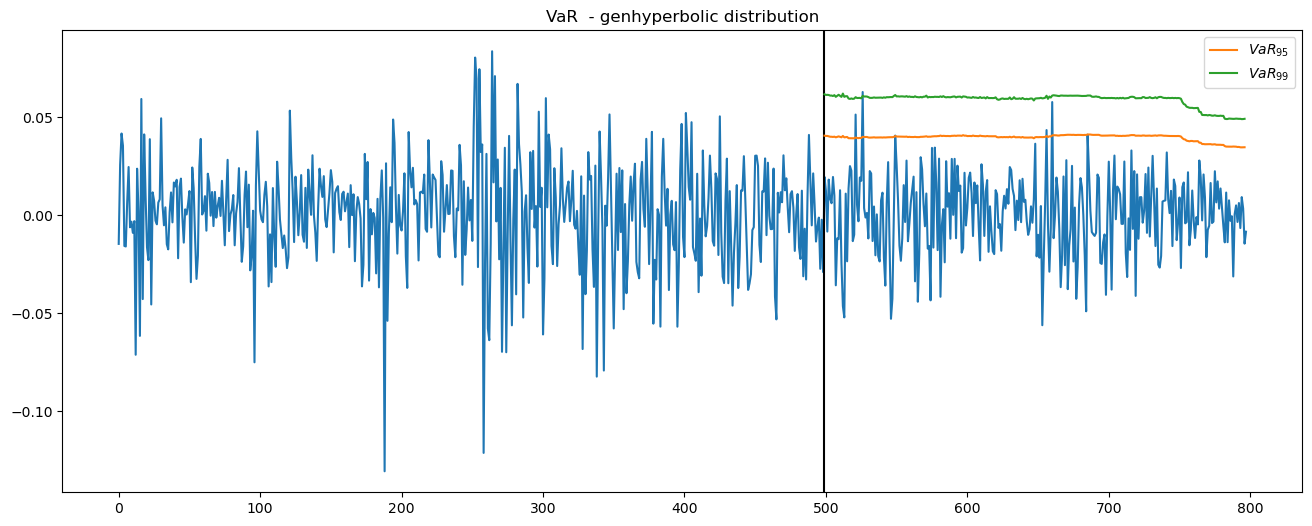

mielke


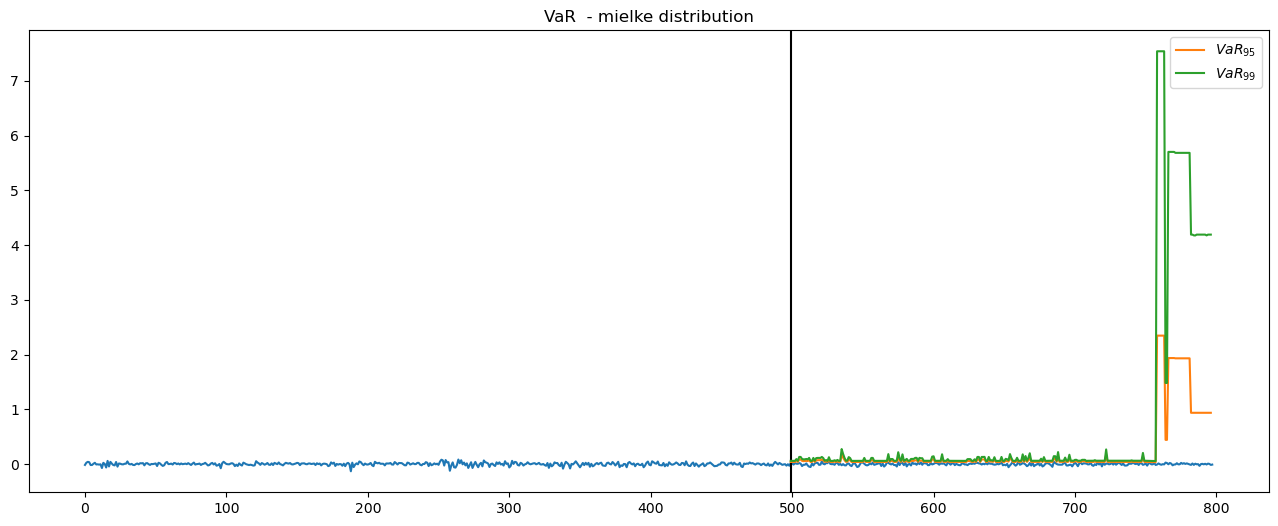

johnsonsu


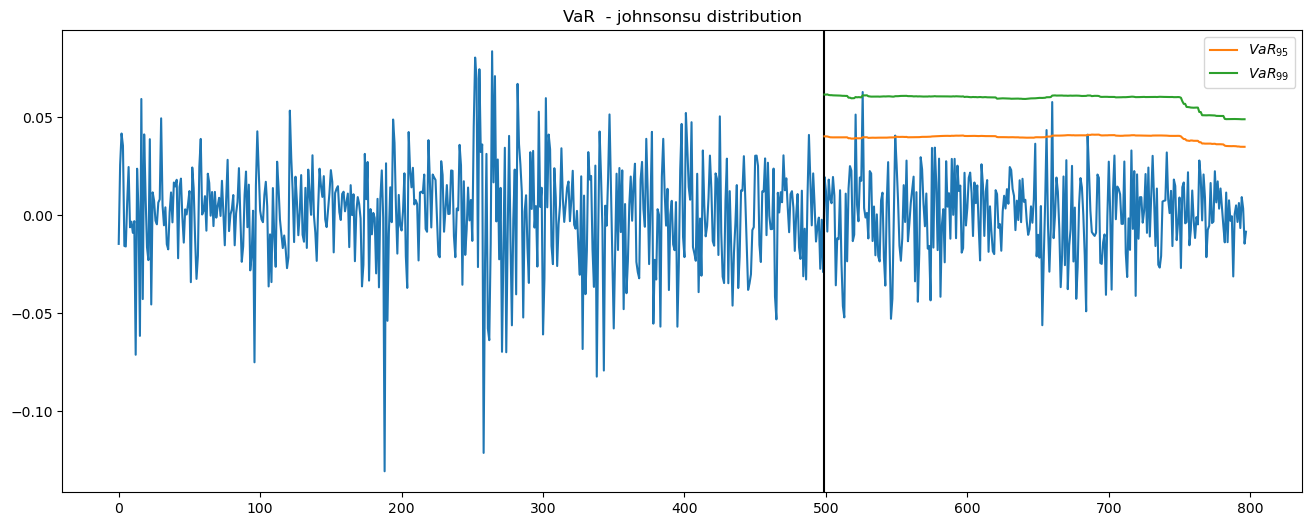

nct


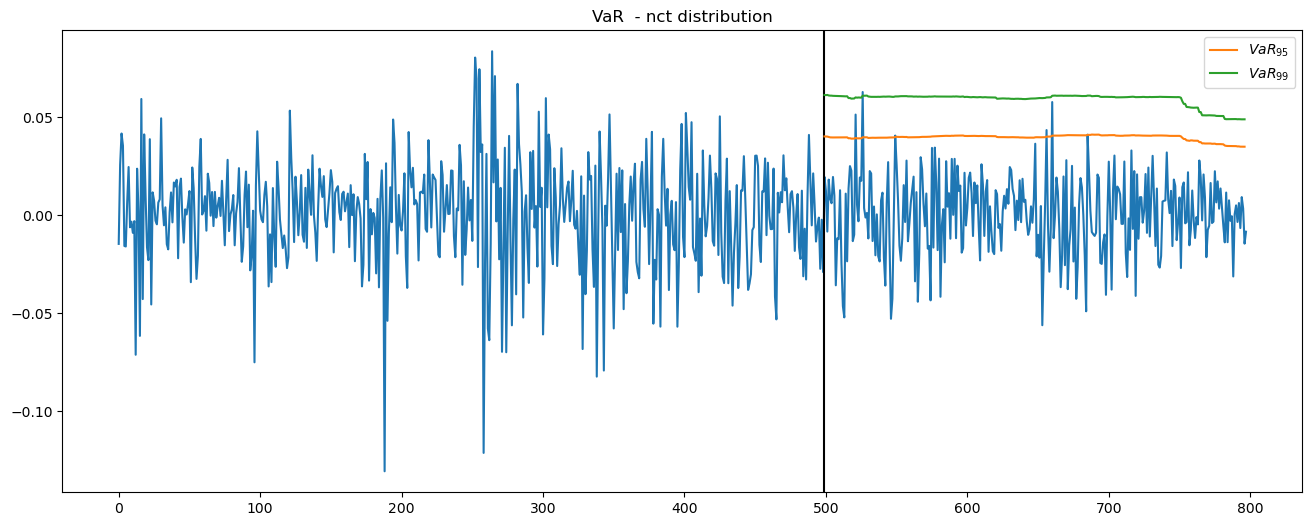

burr


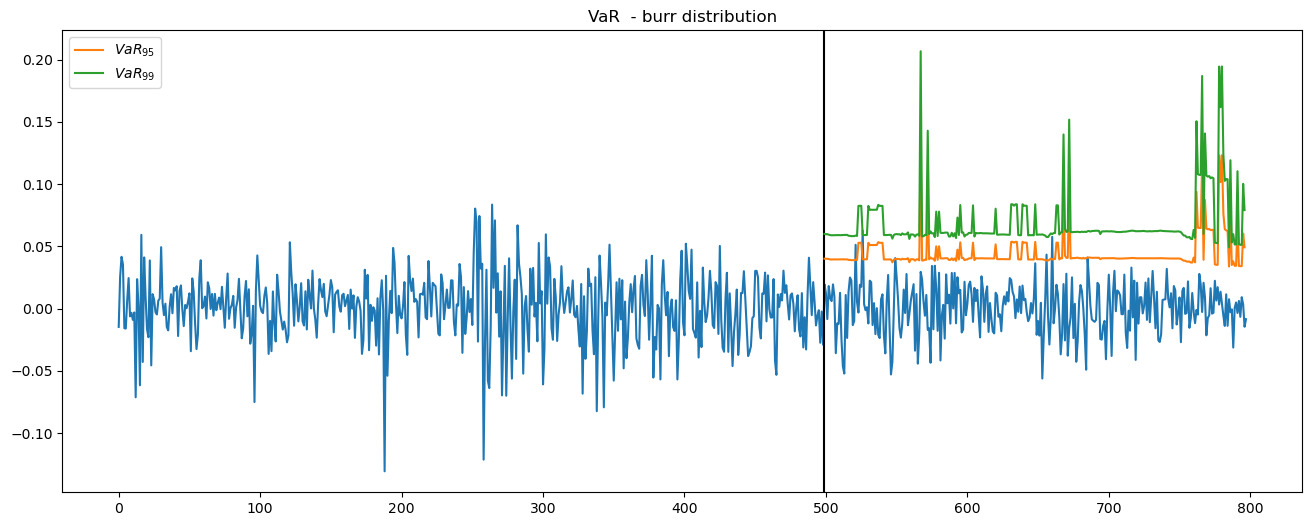

genlogistic


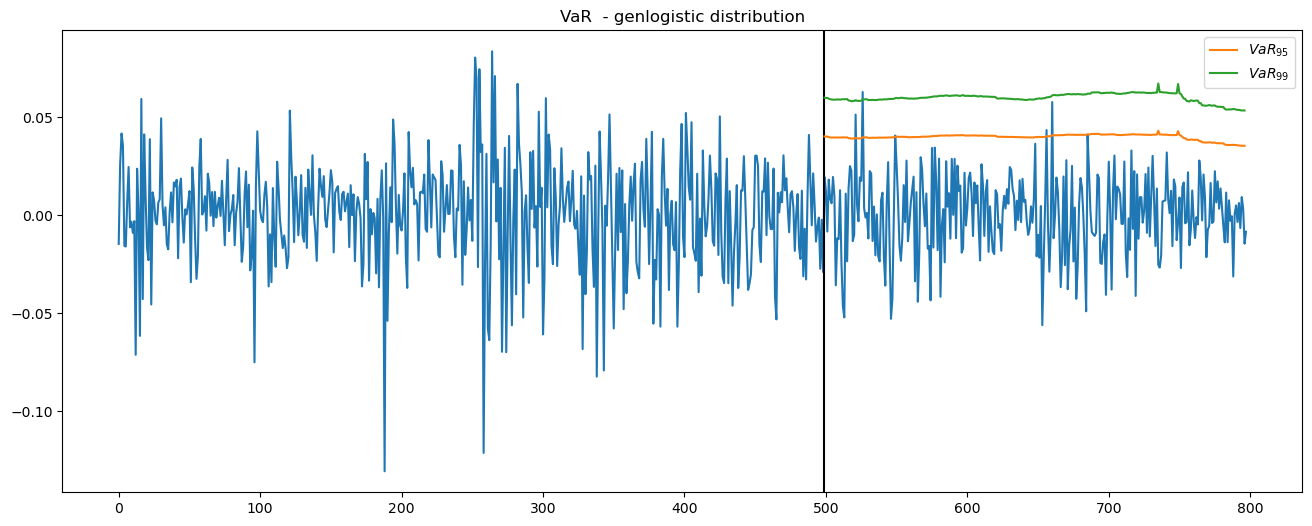

norminvgauss


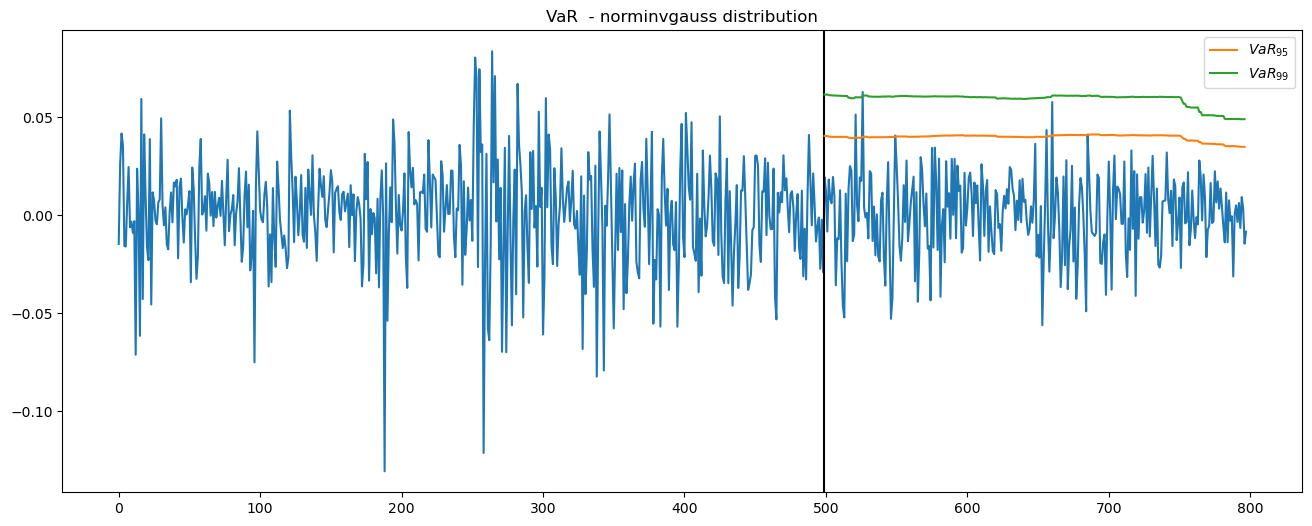

burr12


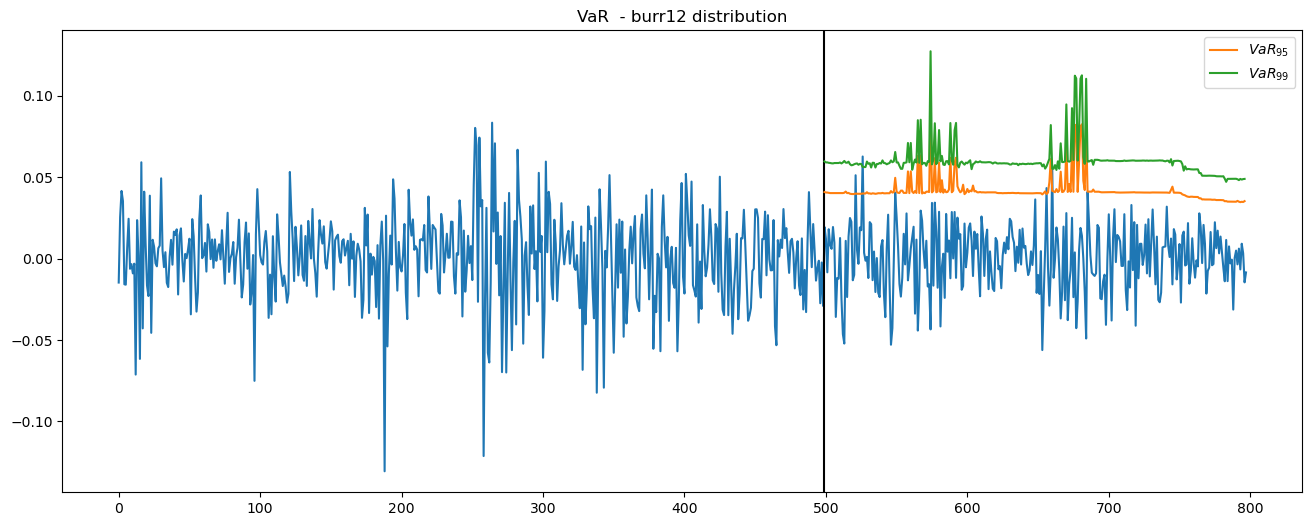

crystalball


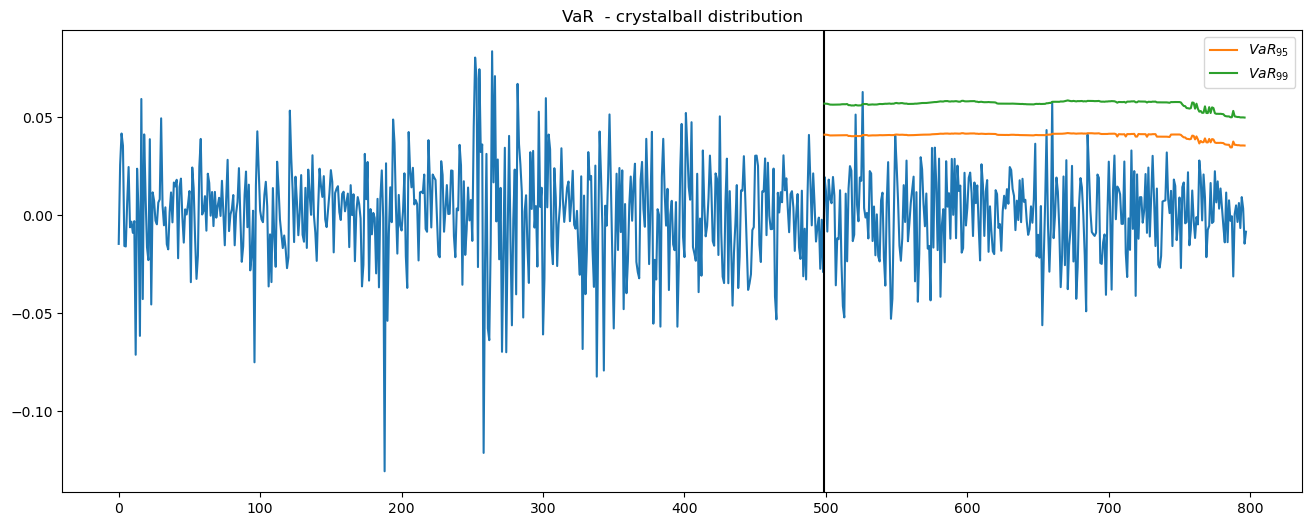

t


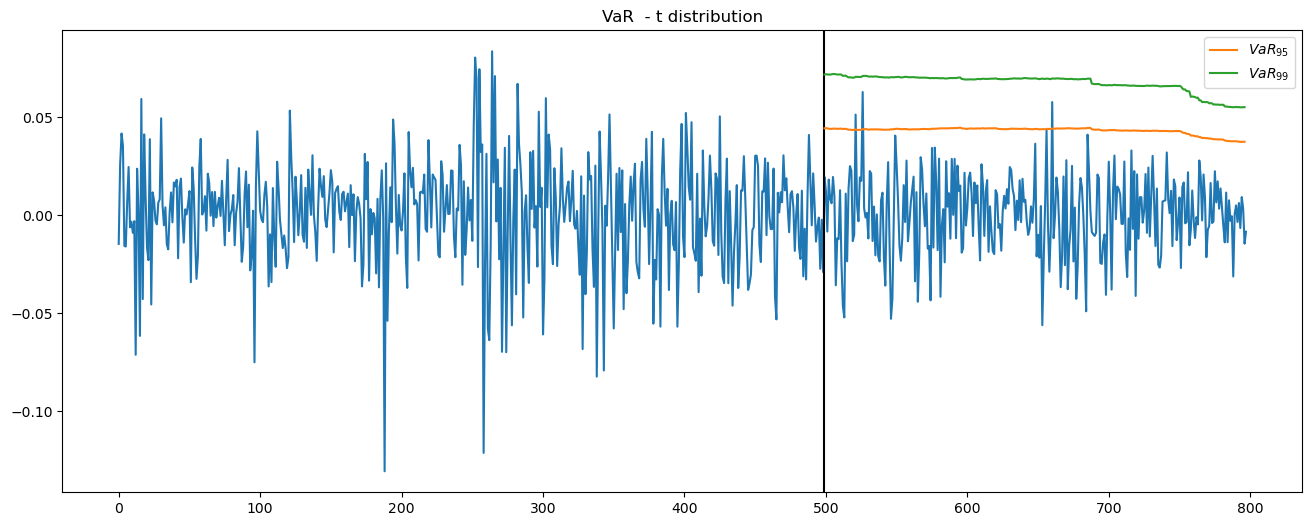

fisk


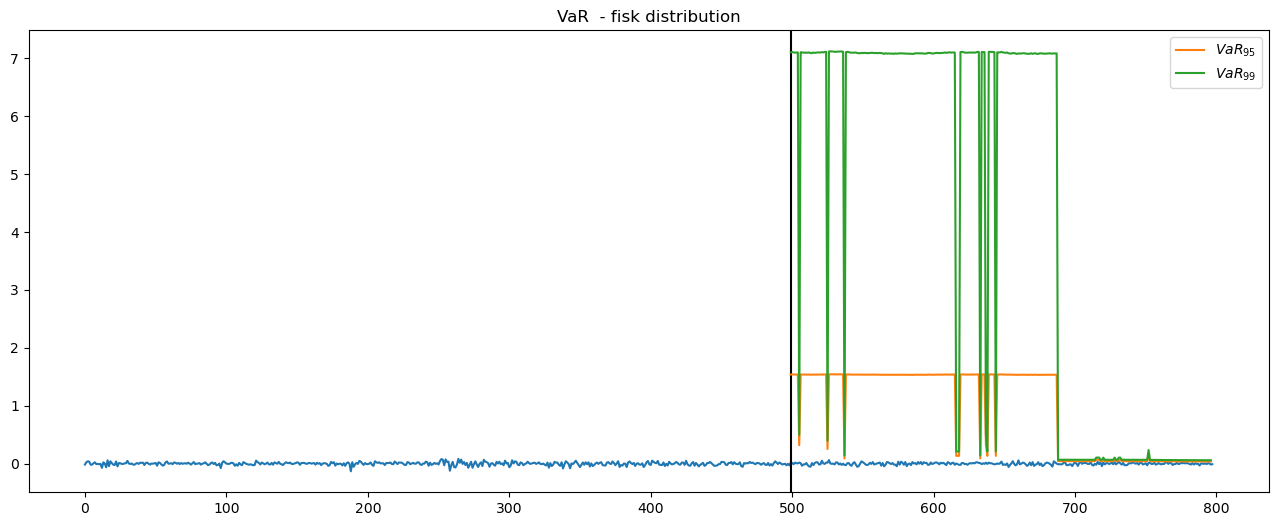

logistic


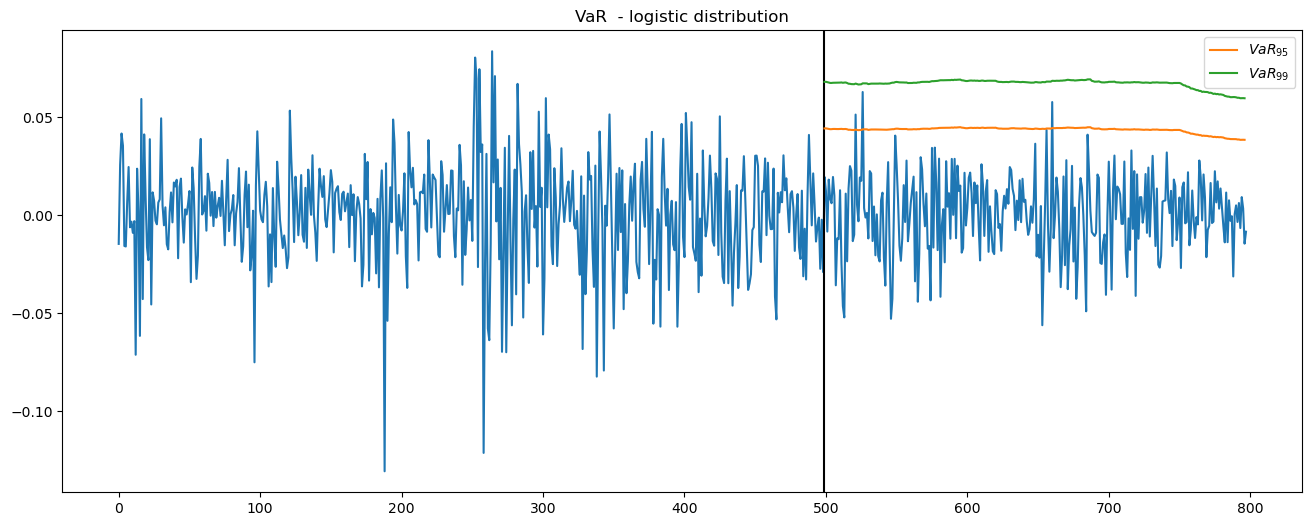

tukeylambda


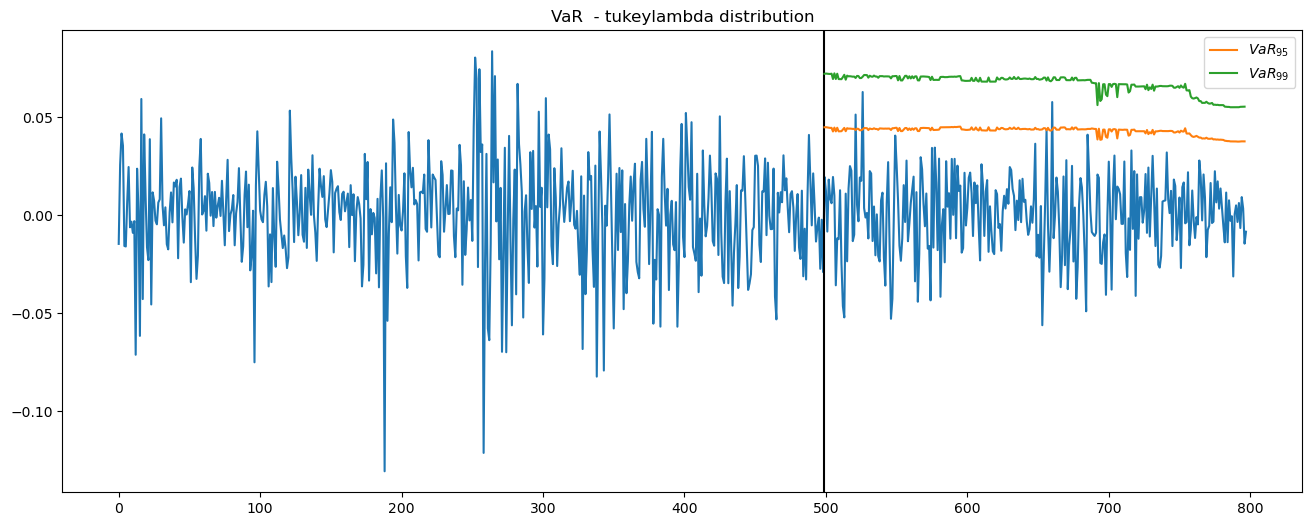

powernorm


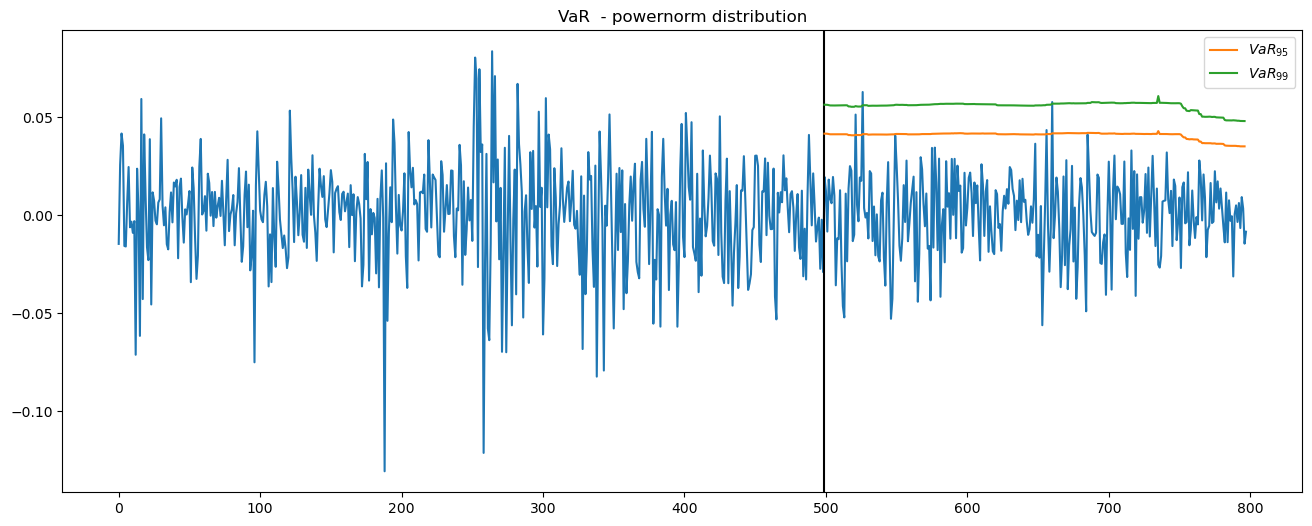

powerlognorm


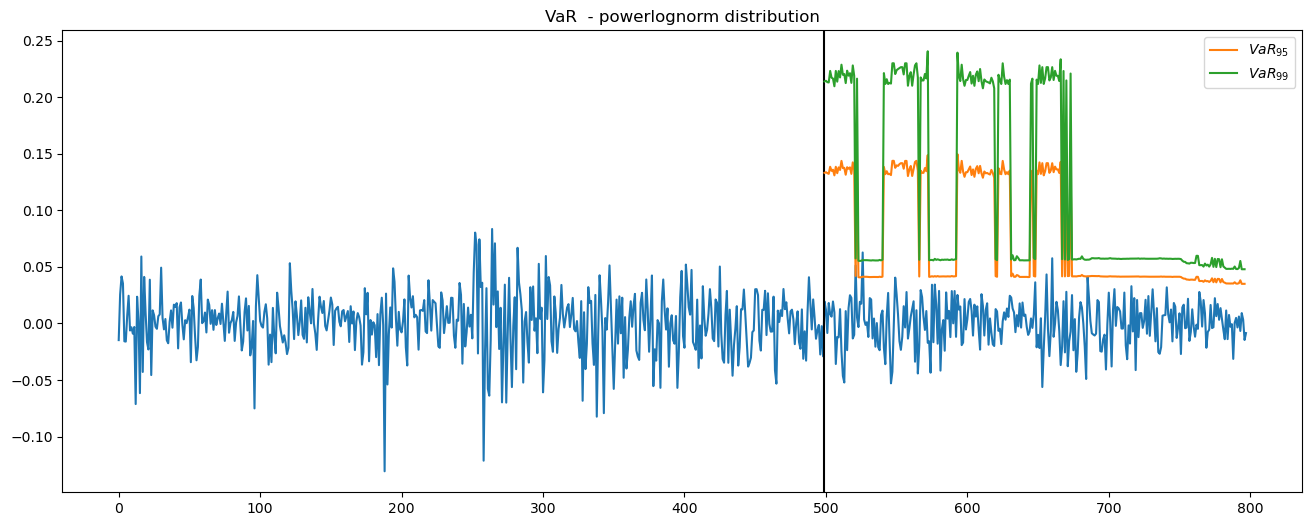

exponweib


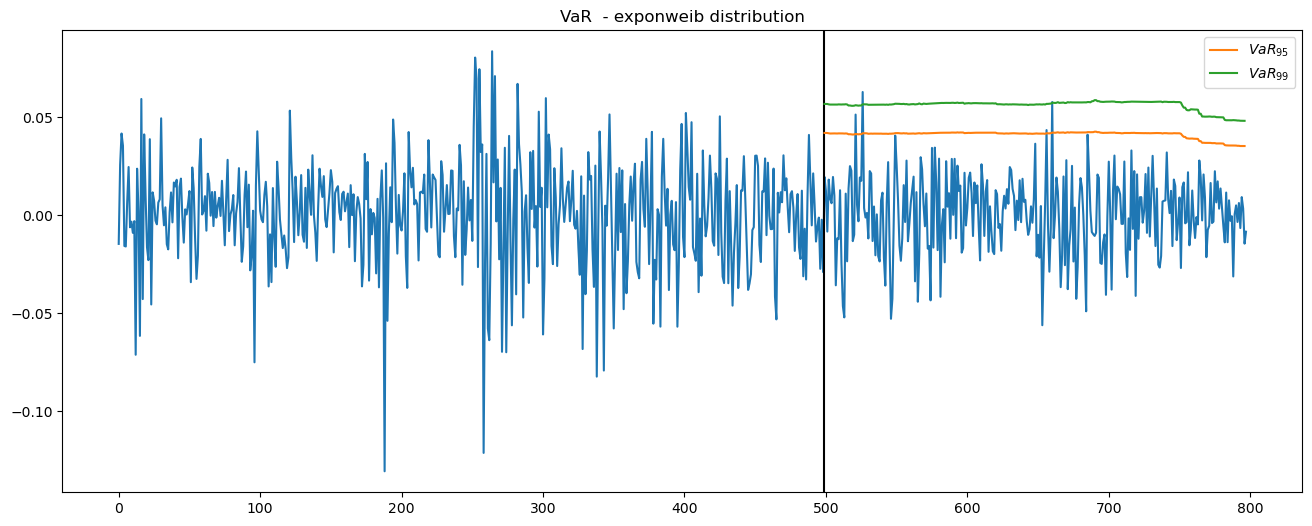

gengamma


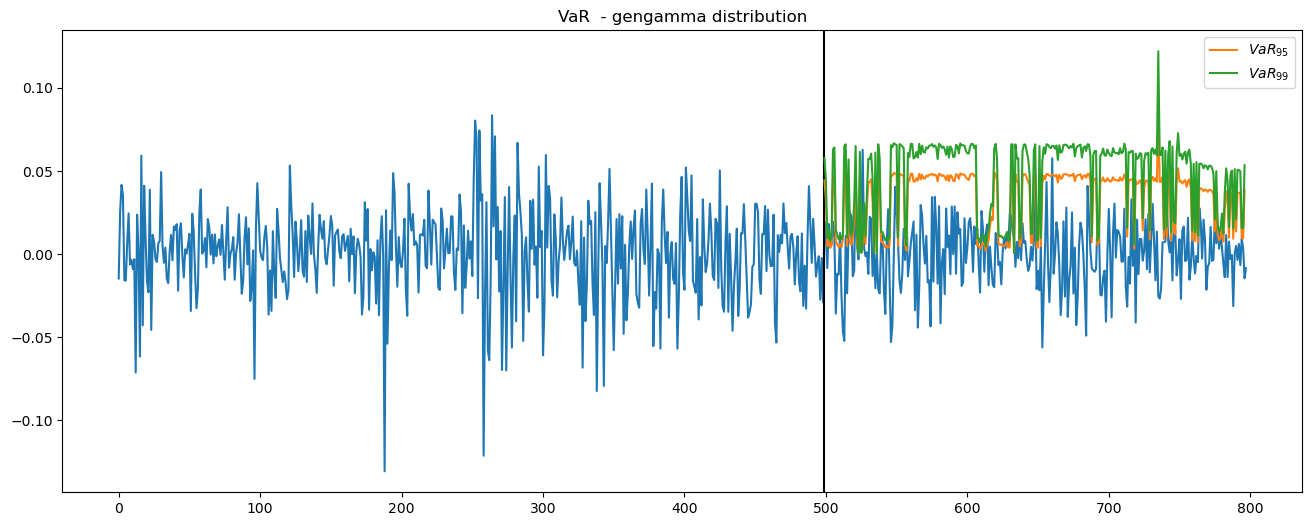

loggamma


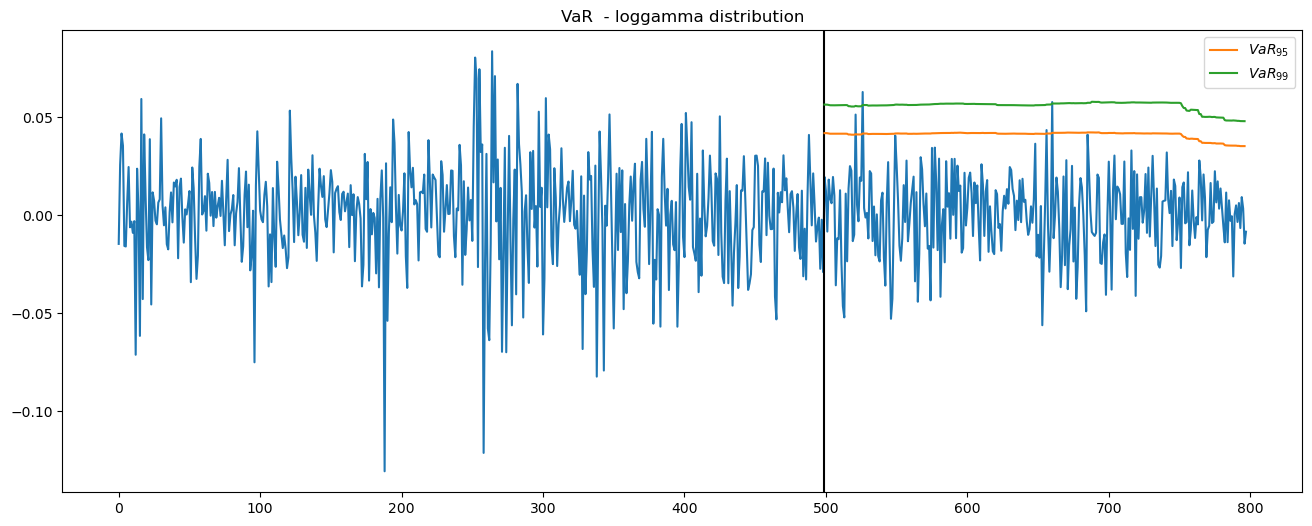

hypsecant


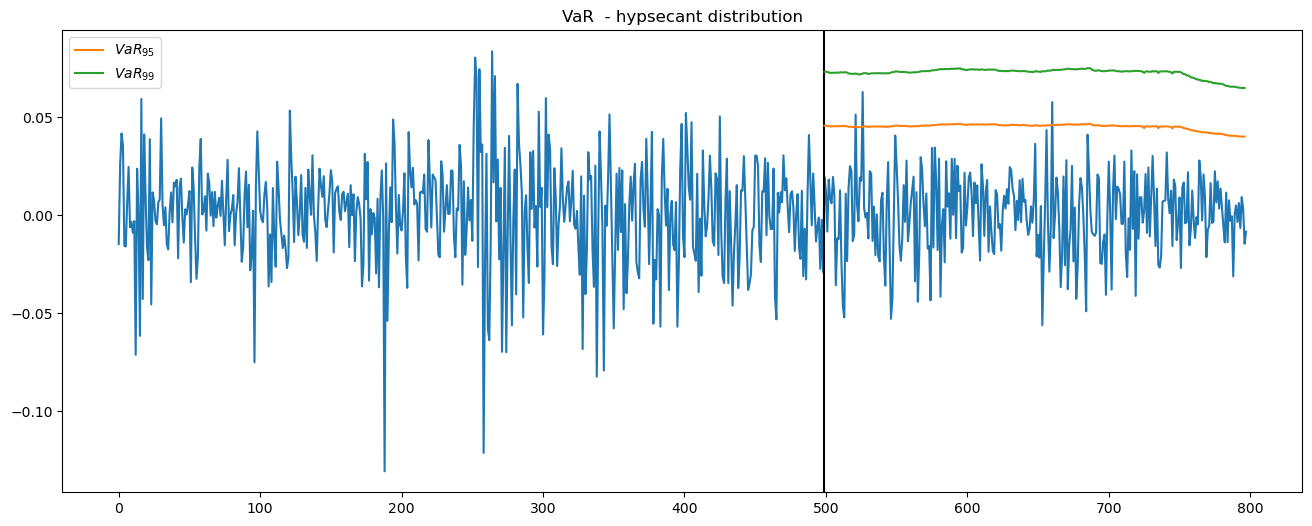

dweibull


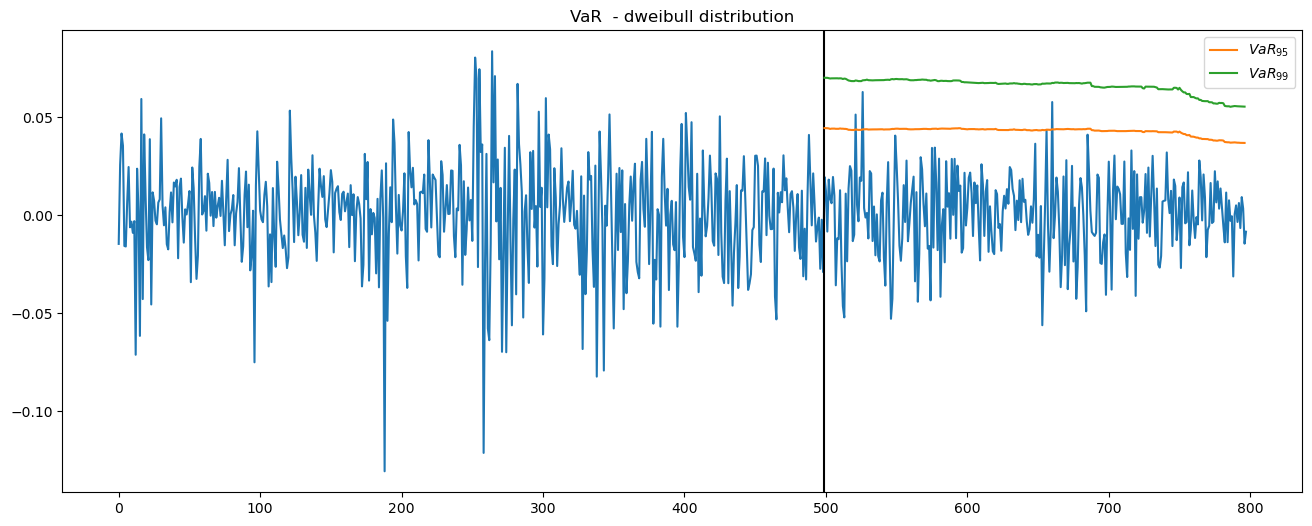

In [3]:
for dist_type in fitted_dist['distributions'][:20]:
    print(dist_type)
    filename = './data_distfit/fitted_{}.csv'.format(dist_type)
    df1 = pd.read_csv(filename, index_col=0)
    add_VaR(df1, dist_type)
    df1.to_csv(filename)
    savename = './images/VaR/{}.pdf'.format(dist_type)
    plot_vars(df1, dist_type, r, save=True, name=savename)
    #plt.plot(df1['t_max'][1:], df1['SSE'][1:], color='C3')


In [4]:
# eliminuję rozkłady z nagłymi skokami współczynników
dst = (
"genhyperbolic" ,
#mielke ,
"johnsonsu" ,
"nct" ,
#burr ,
"genlogistic" ,
"norminvgauss" ,
#burr12 ,
"crystalball" ,
"t" ,
#fisk ,
"logistic" ,
"tukeylambda" ,
#powernorm ,
"powerlognorm" ,
"exponweib" ,
"gengamma" ,
"loggamma" ,
"hypsecant" ,
"dweibull" )

genhyperbolic


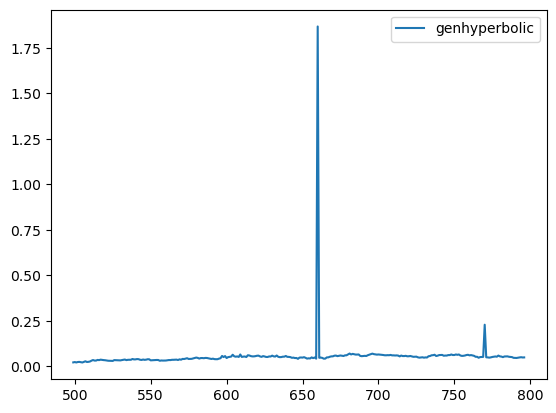

johnsonsu


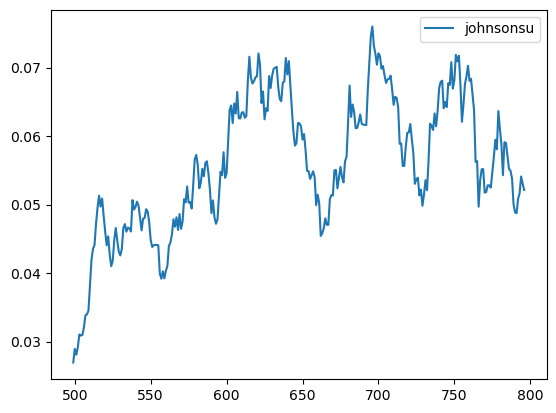

nct


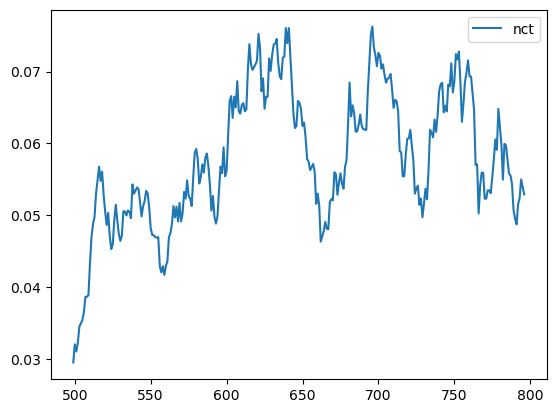

genlogistic


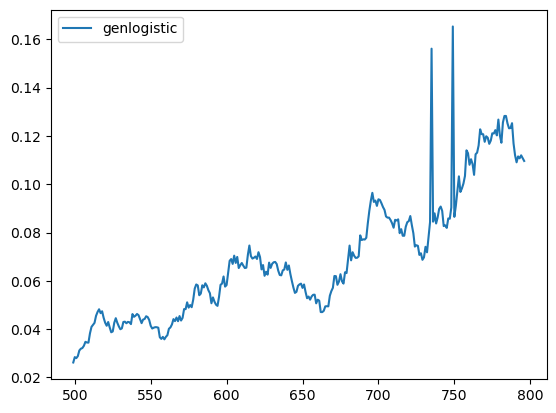

norminvgauss


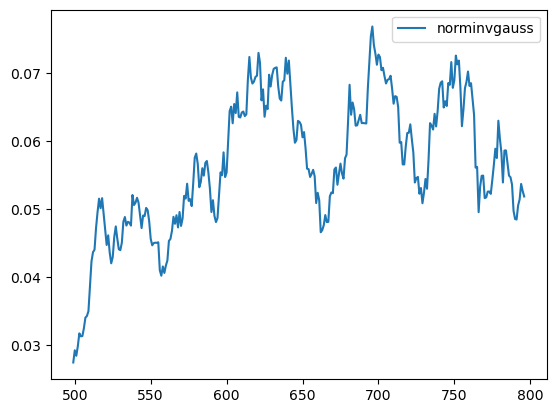

crystalball


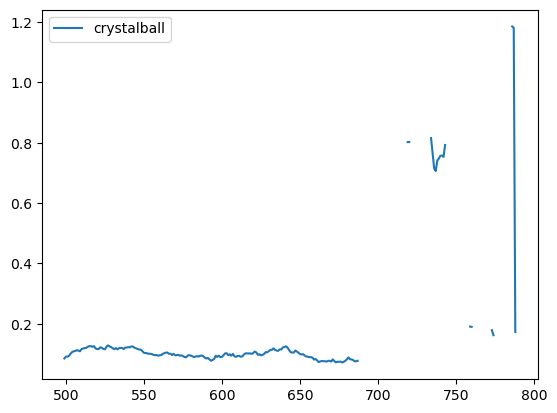

t


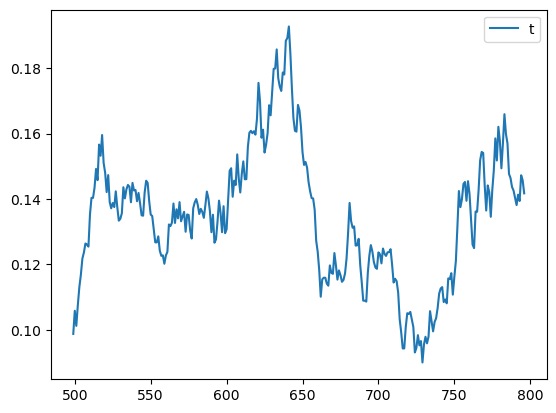

logistic


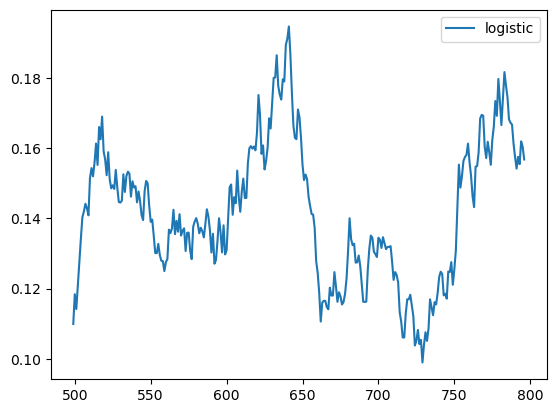

tukeylambda


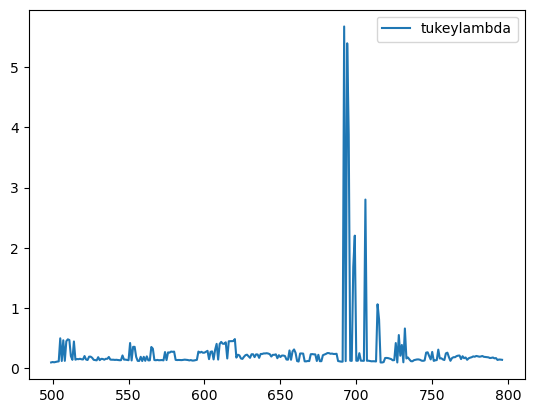

powerlognorm


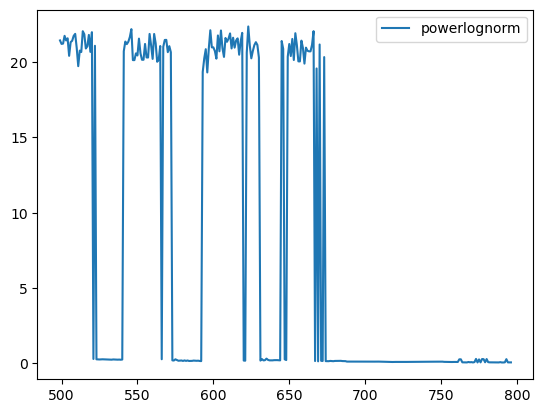

exponweib


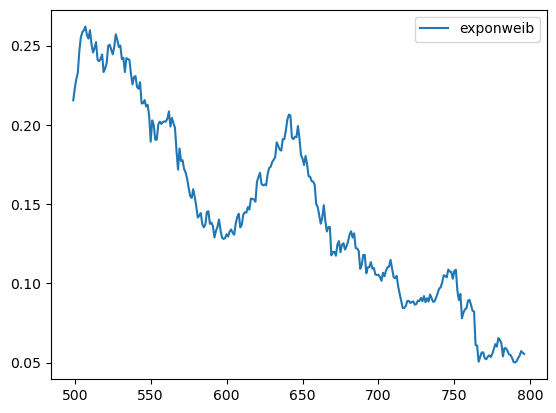

gengamma


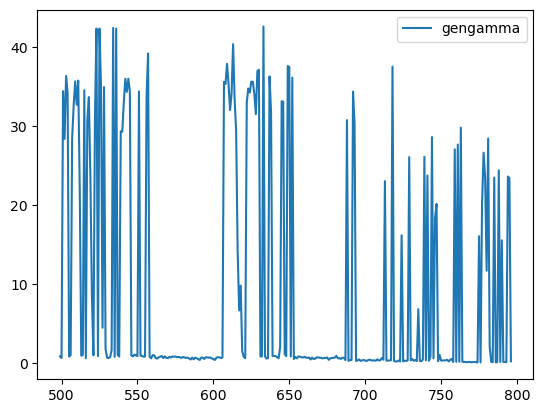

loggamma


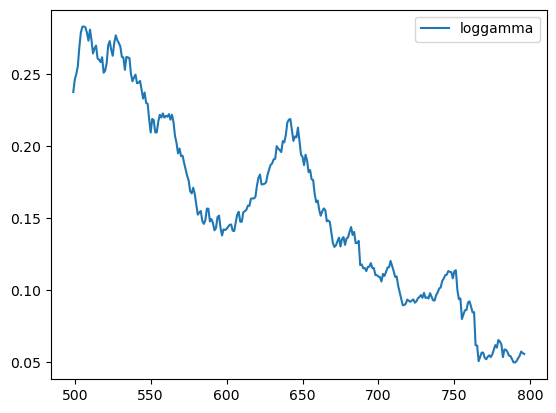

hypsecant


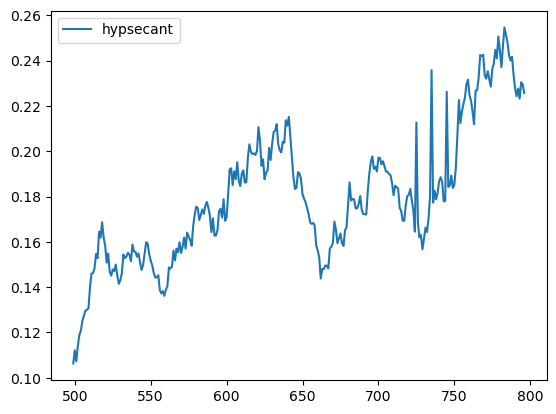

dweibull


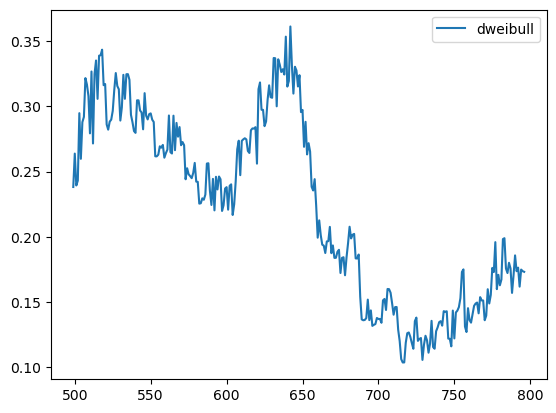

In [5]:
#fit = plt.figure(figsize=(8,6))
for dist_type in dst:
    print(dist_type)
    filename = './data_distfit/fitted_{}.csv'.format(dist_type)
    df1 = pd.read_csv(filename, index_col=0)
    plt.plot(df1['t_max'][1:], df1['SSE'][1:], label=dist_type)
    plt.legend()
    plt.show()



In [6]:
# eliminuję rozkłady z dużymi skokami funkcji odległości od dystrybuanty empirycznej 
#(źle reagują na odstające obserwacje)
dst = (
#"genhyperbolic" ,
"johnsonsu" ,
"nct" ,
"genlogistic" ,
"norminvgauss" ,
#"crystalball" ,
"t" ,
"logistic" ,
#"tukeylambda" ,
#"powerlognorm" ,
"exponweib" ,
#"gengamma" ,
"loggamma" ,
"hypsecant" ,
"dweibull" )

johnsonsu
nct
genlogistic
norminvgauss
t
logistic
exponweib
loggamma
hypsecant
dweibull


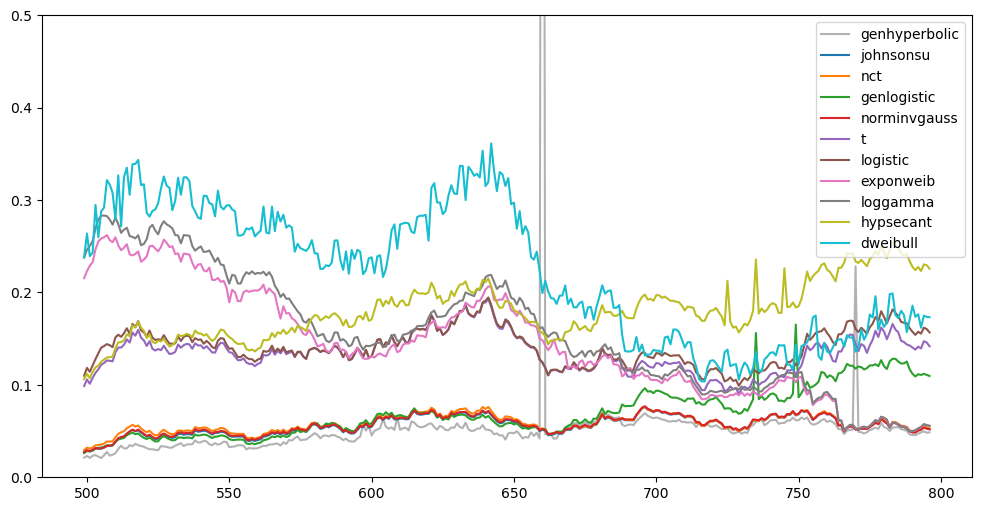

In [7]:
fit = plt.figure(figsize=(12,6))
filename = './data_distfit/fitted_{}.csv'.format("genhyperbolic")
df1 = pd.read_csv(filename, index_col=0)
plt.plot(df1['t_max'][1:], df1['SSE'][1:], label="genhyperbolic", color='k', alpha=0.3)

for dist_type in dst:
    print(dist_type)
    filename = './data_distfit/fitted_{}.csv'.format(dist_type)
    df1 = pd.read_csv(filename, index_col=0)
    plt.plot(df1['t_max'][1:], df1['SSE'][1:], label=dist_type)
plt.legend()
plt.ylim(0,0.5)
plt.show()

In [8]:
dst = (
"genhyperbolic" ,
"johnsonsu" ,
"nct" ,
"genlogistic" ,
"norminvgauss" ,
"t" ,
"logistic" ,
"exponweib" ,
"loggamma"
)

genhyperbolic
johnsonsu
nct
genlogistic
norminvgauss
t
logistic
exponweib
loggamma


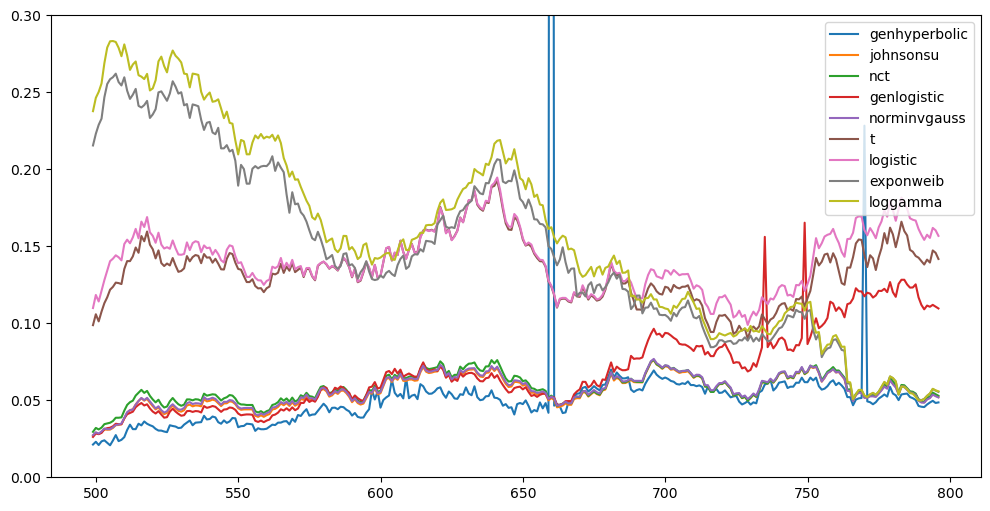

In [9]:
fit = plt.figure(figsize=(12,6))
for dist_type in dst:
    print(dist_type)
    filename = './data_distfit/fitted_{}.csv'.format(dist_type)
    df1 = pd.read_csv(filename, index_col=0)
    plt.plot(df1['t_max'][1:], df1['SSE'][1:], label=dist_type)
plt.legend()
plt.ylim(0,0.3)
plt.show()

genhyperbolic
johnsonsu
nct
genlogistic
norminvgauss
t
loggamma


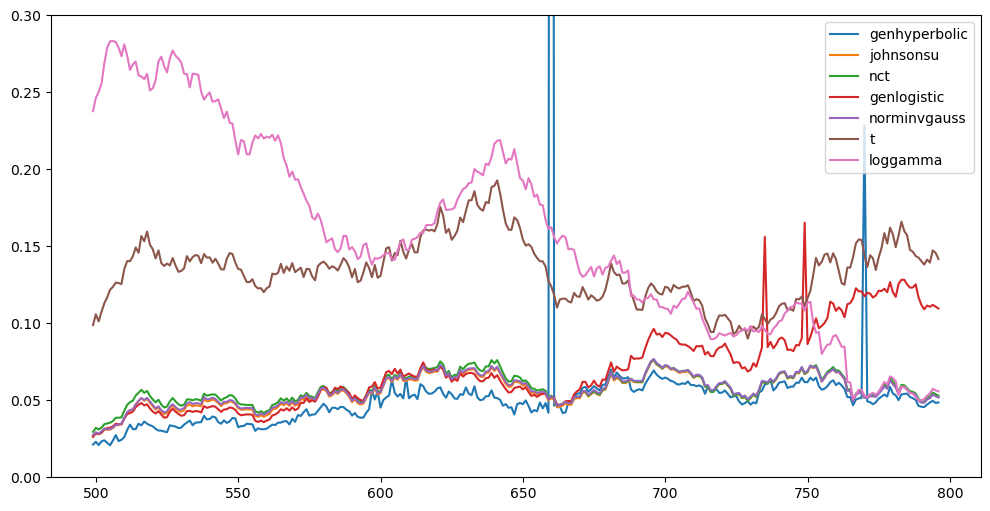

In [10]:
dst = (
"genhyperbolic" ,
"johnsonsu" ,
"nct" ,
"genlogistic" ,
"norminvgauss" ,
"t" ,
#"logistic" ,
#"exponweib" ,
"loggamma"
)
fit = plt.figure(figsize=(12,6))
for dist_type in dst:
    print(dist_type)
    filename = './data_distfit/fitted_{}.csv'.format(dist_type)
    df1 = pd.read_csv(filename, index_col=0)
    plt.plot(df1['t_max'][1:], df1['SSE'][1:], label=dist_type)
plt.legend()
plt.ylim(0,0.3)
plt.show()

genhyperbolic
johnsonsu
nct
norminvgauss


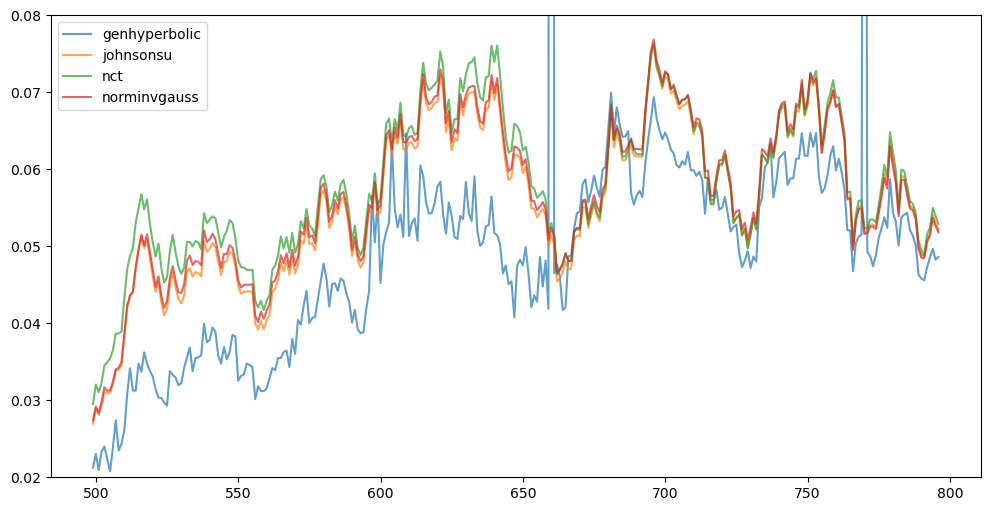

In [11]:
dst = (
"genhyperbolic" ,
"johnsonsu" ,
"nct" ,
#"genlogistic" ,
"norminvgauss" ,
#"t" ,
#"loggamma"
)
fit = plt.figure(figsize=(12,6))
for dist_type in dst:
    print(dist_type)
    filename = './data_distfit/fitted_{}.csv'.format(dist_type)
    df1 = pd.read_csv(filename, index_col=0)
    plt.plot(df1['t_max'][1:], df1['SSE'][1:], label=dist_type, alpha=0.7)
plt.legend()
plt.ylim(.02,.08)
plt.show()

## EVAR

t


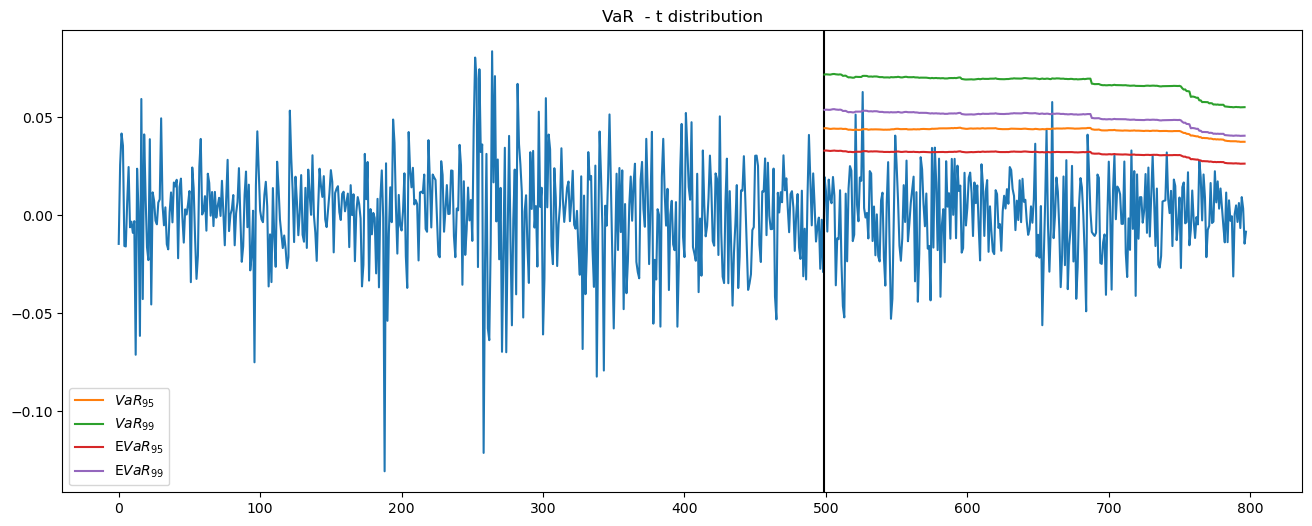

fisk


C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:2958: IntegrationWarning: The occurrence of roundoff error is detected, which prevents 
  the requested tolerance from being achieved.  The error may be 
  underestimated.
  cd = integrate.quad(fun, c, d, **kwds)[0]
C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:2959: IntegrationWarning: The occurrence of roundoff error is detected, which prevents 
  the requested tolerance from being achieved.  The error may be 
  underestimated.
  dub = integrate.quad(fun, d, ub, **kwds)[0]
C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:2957: IntegrationWarning: The occurrence of roundoff error is detected, which prevents 
  the requested tolerance from being achieved.  The error may be 
  underestimated.
  lbc = integrate.quad(fun, lb, c, **kwds)[0]
C:\Users\jagod\Documents\ryzyko\risk\projekt3\param\VaR_func.py:48: RuntimeWarning: The iteration is not mak

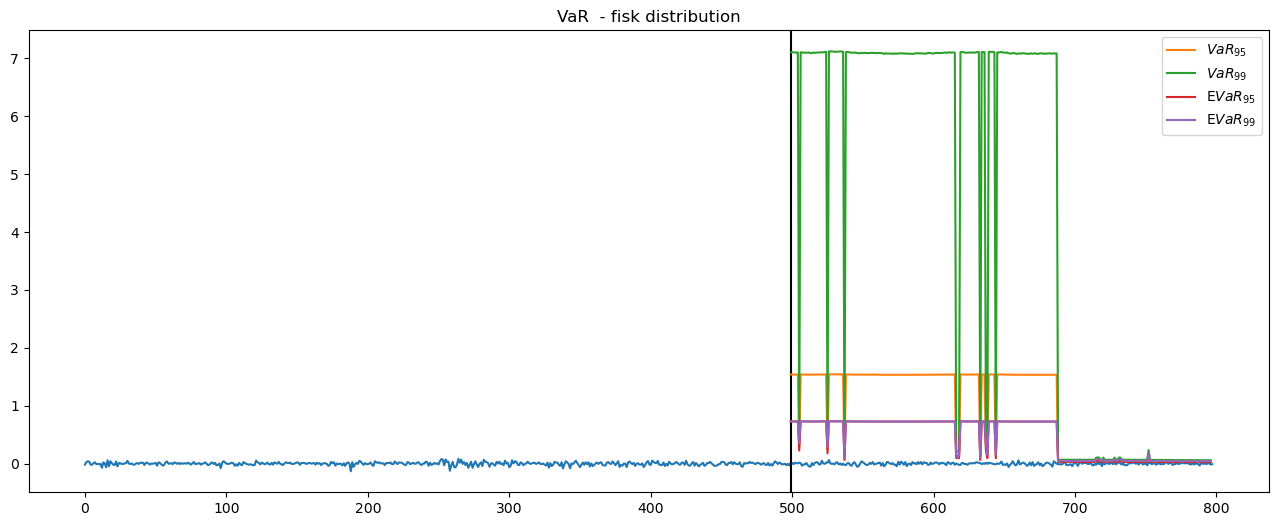

logistic


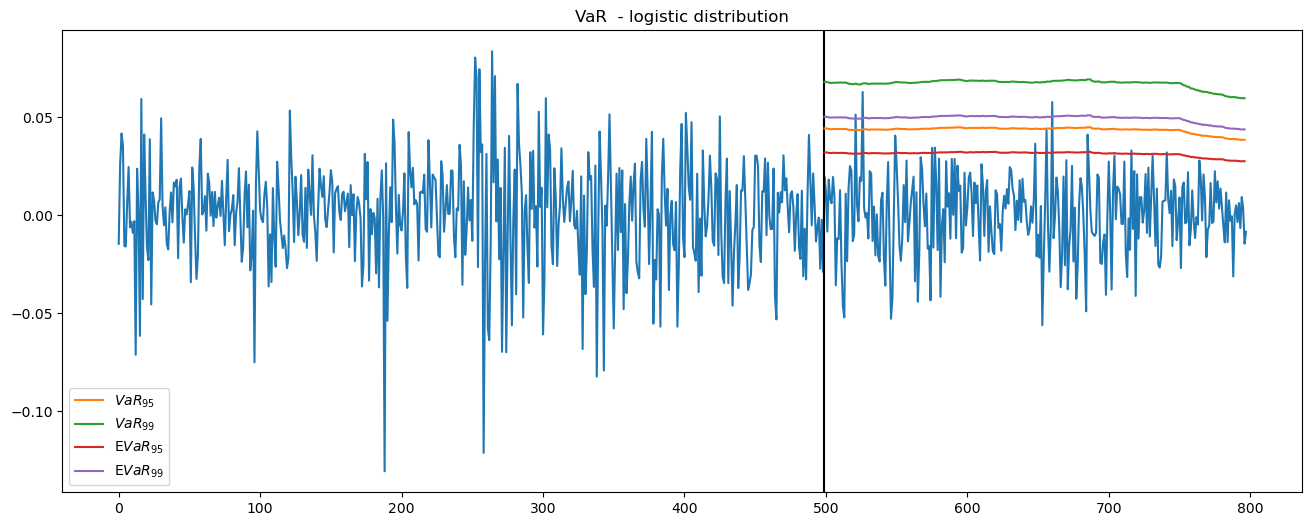

tukeylambda


C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\_continuous_distns.py:10269: RuntimeWarning: divide by zero encountered in power
  Px = Fx**(lam-1.0) + (np.asarray(1-Fx))**(lam-1.0)


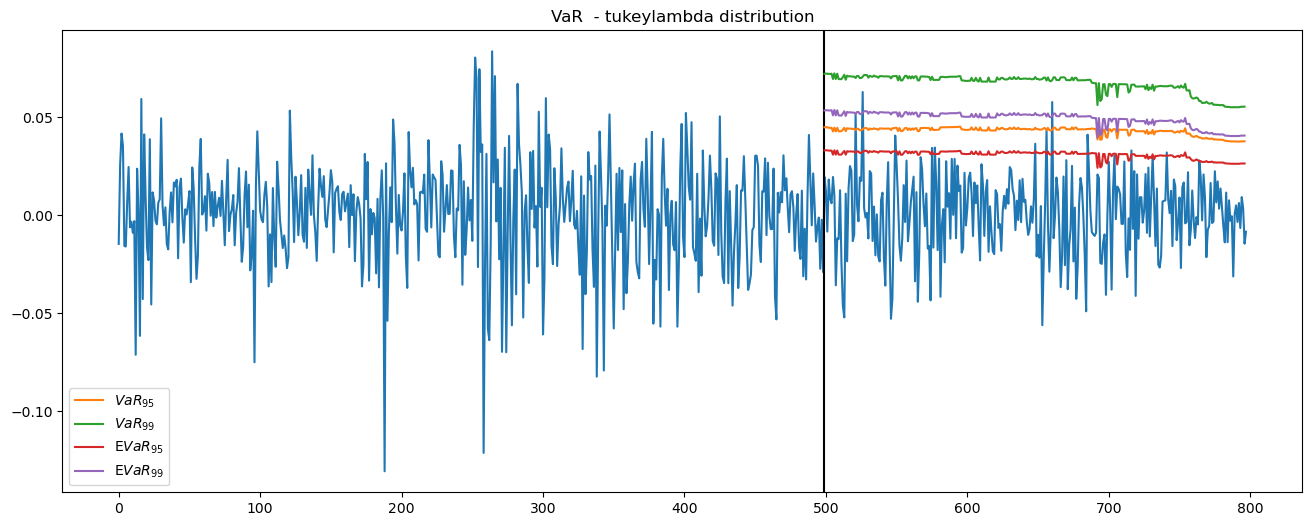

powernorm


C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:1936: IntegrationWarning: The integral is probably divergent, or slowly convergent.
  return integrate.quad(self._mom_integ1, 0, 1, args=(m,)+args)[0]


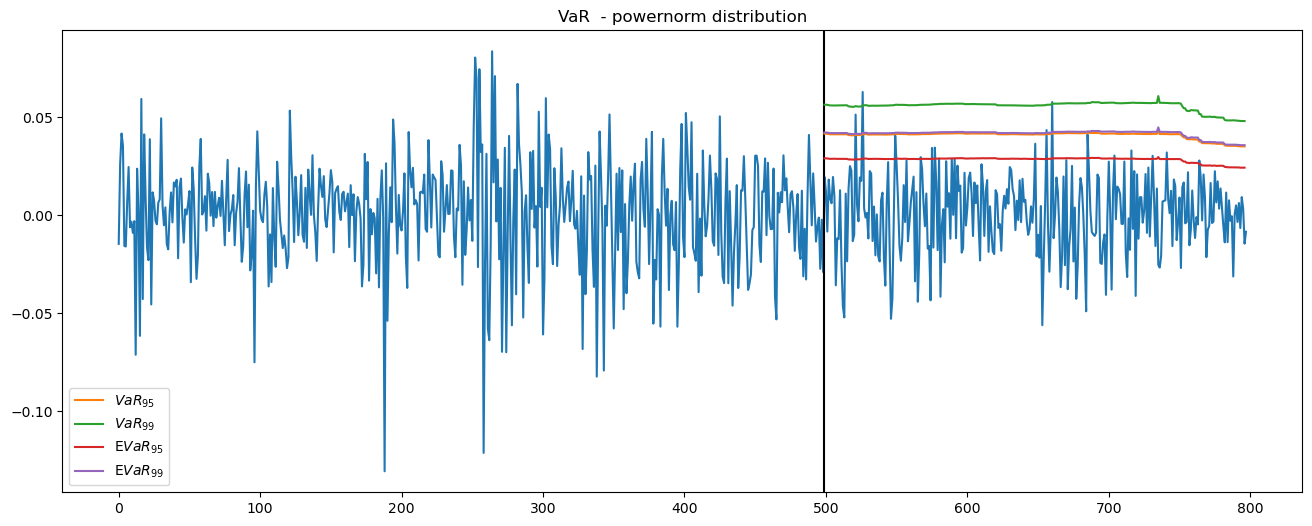

powerlognorm


C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:2958: IntegrationWarning: The occurrence of roundoff error is detected, which prevents 
  the requested tolerance from being achieved.  The error may be 
  underestimated.
  cd = integrate.quad(fun, c, d, **kwds)[0]
C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:2959: IntegrationWarning: The occurrence of roundoff error is detected, which prevents 
  the requested tolerance from being achieved.  The error may be 
  underestimated.
  dub = integrate.quad(fun, d, ub, **kwds)[0]
C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:2957: IntegrationWarning: The occurrence of roundoff error is detected, which prevents 
  the requested tolerance from being achieved.  The error may be 
  underestimated.
  lbc = integrate.quad(fun, lb, c, **kwds)[0]
C:\Users\jagod\Documents\ryzyko\risk\projekt3\param\VaR_func.py:49: RuntimeWarning: The iteration is not mak

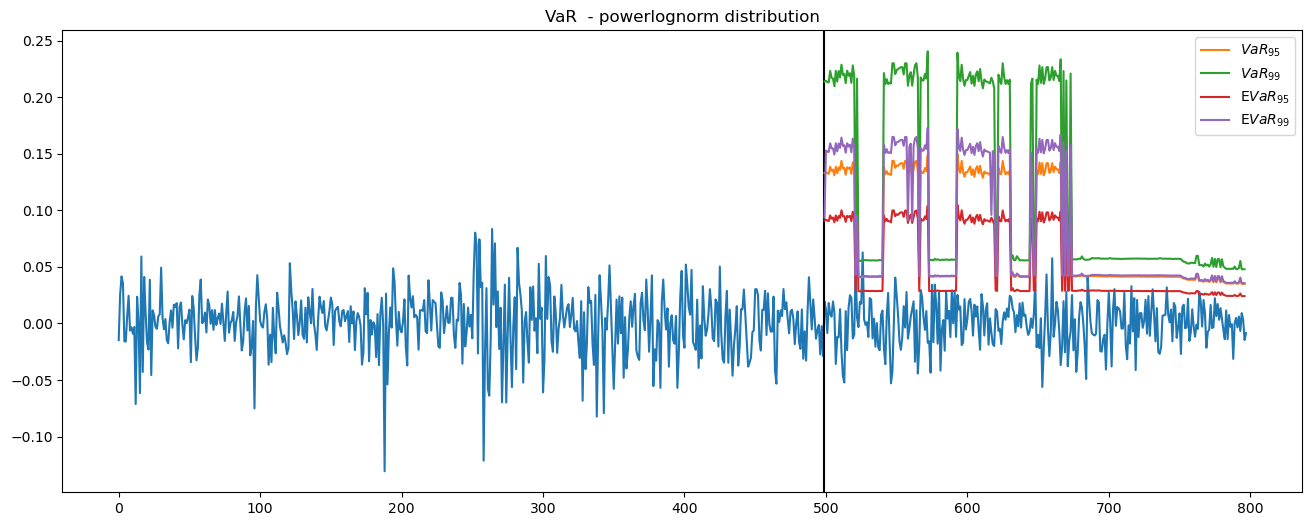

exponweib


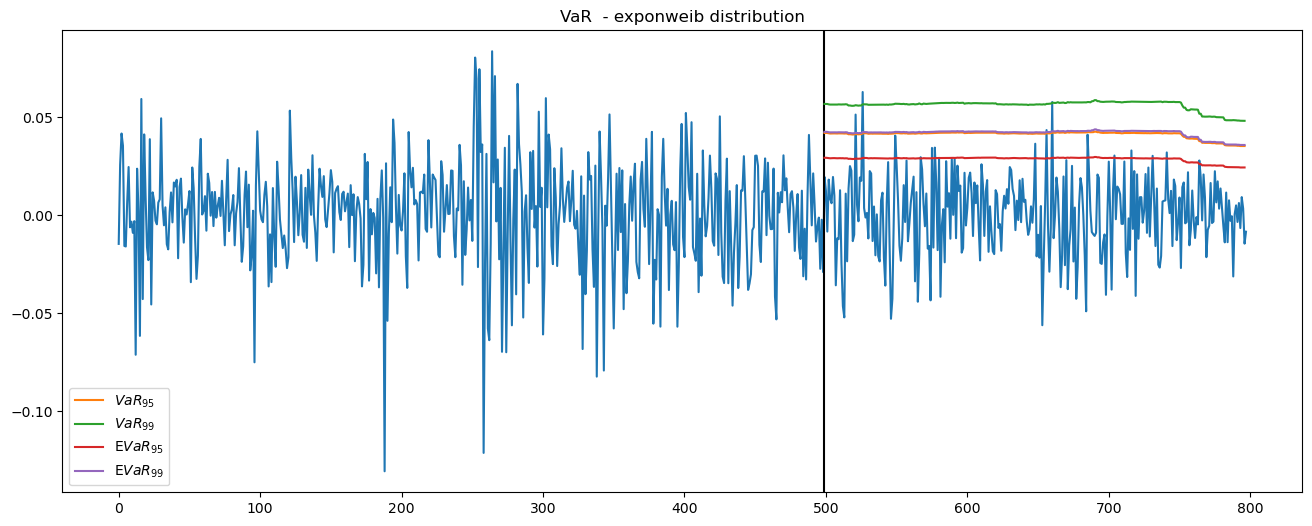

gengamma


C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:2958: IntegrationWarning: Extremely bad integrand behavior occurs at some points of the
  integration interval.
  cd = integrate.quad(fun, c, d, **kwds)[0]
C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:2959: IntegrationWarning: Extremely bad integrand behavior occurs at some points of the
  integration interval.
  dub = integrate.quad(fun, d, ub, **kwds)[0]
C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:2957: IntegrationWarning: The occurrence of roundoff error is detected, which prevents 
  the requested tolerance from being achieved.  The error may be 
  underestimated.
  lbc = integrate.quad(fun, lb, c, **kwds)[0]
C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:2958: IntegrationWarning: The occurrence of roundoff error is detected, which prevents 
  the requested tolerance from being achieved.  The error ma

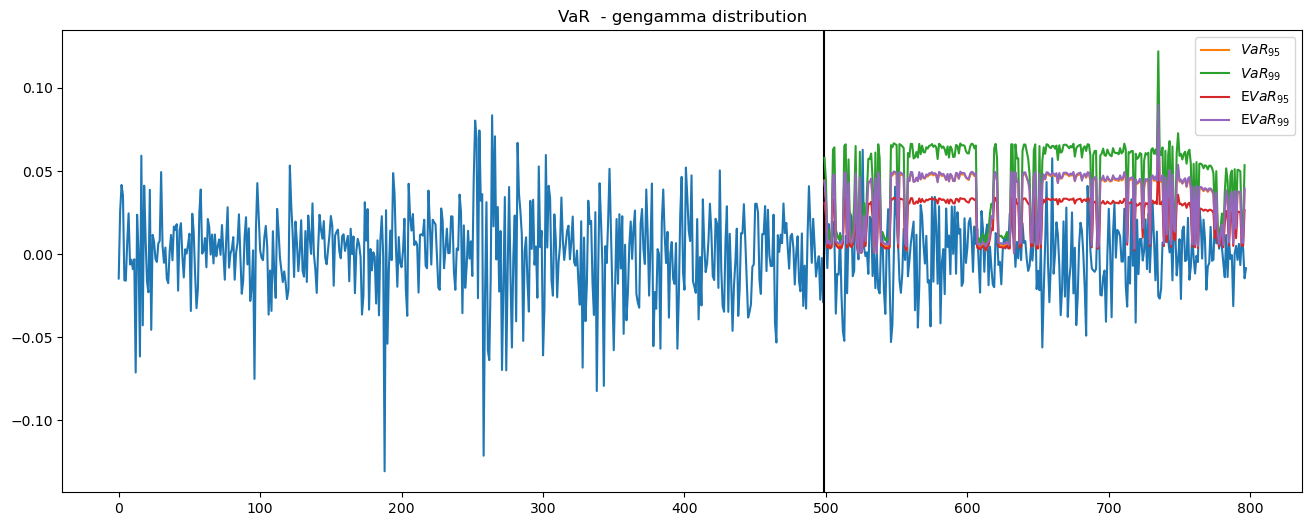

loggamma


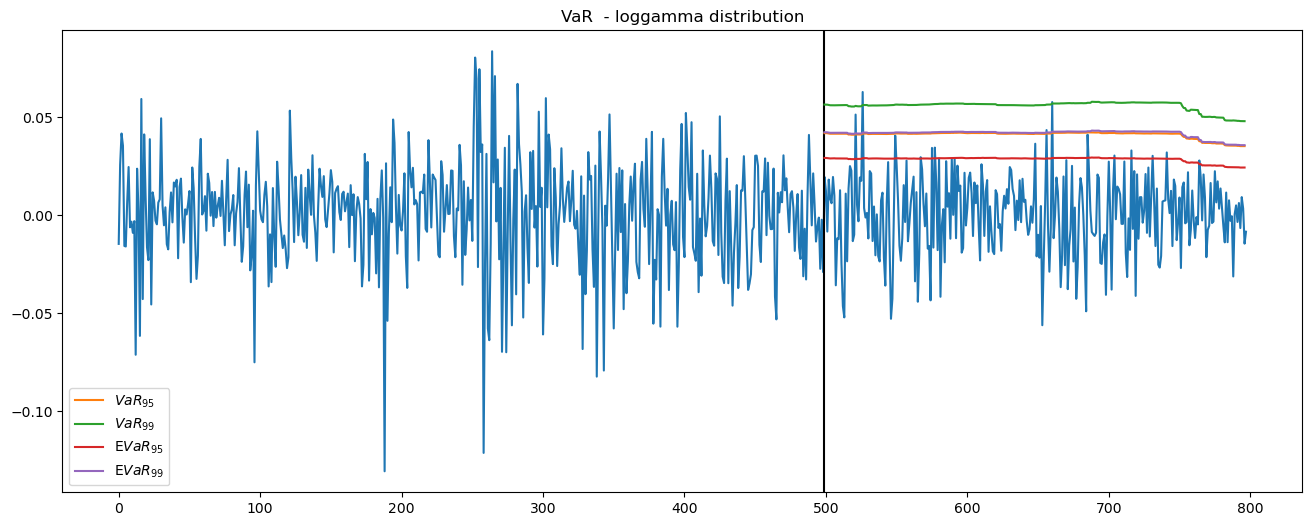

hypsecant


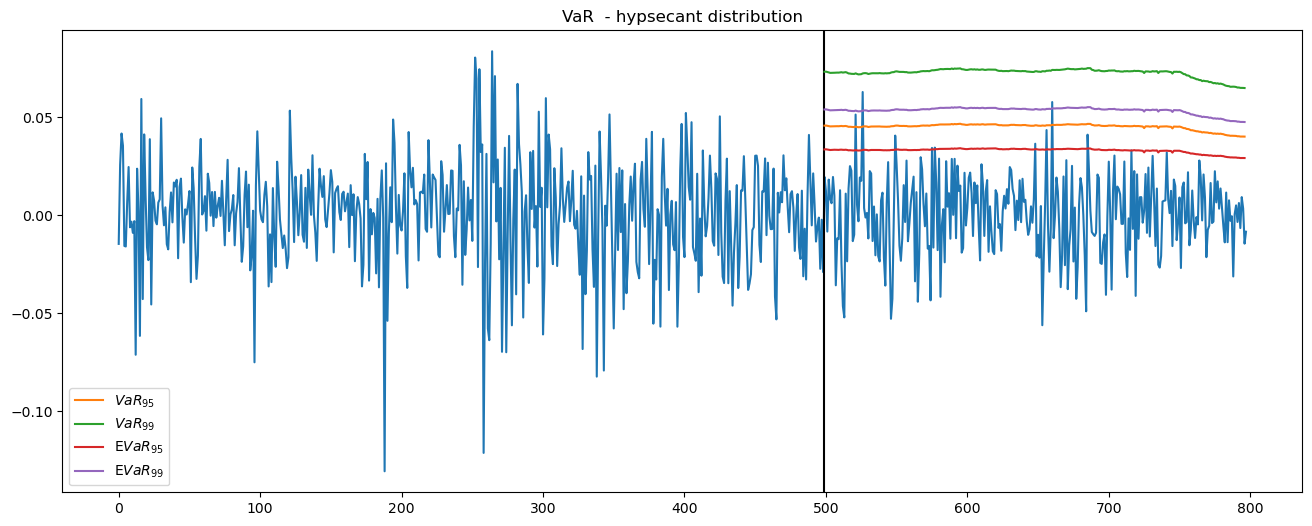

dweibull


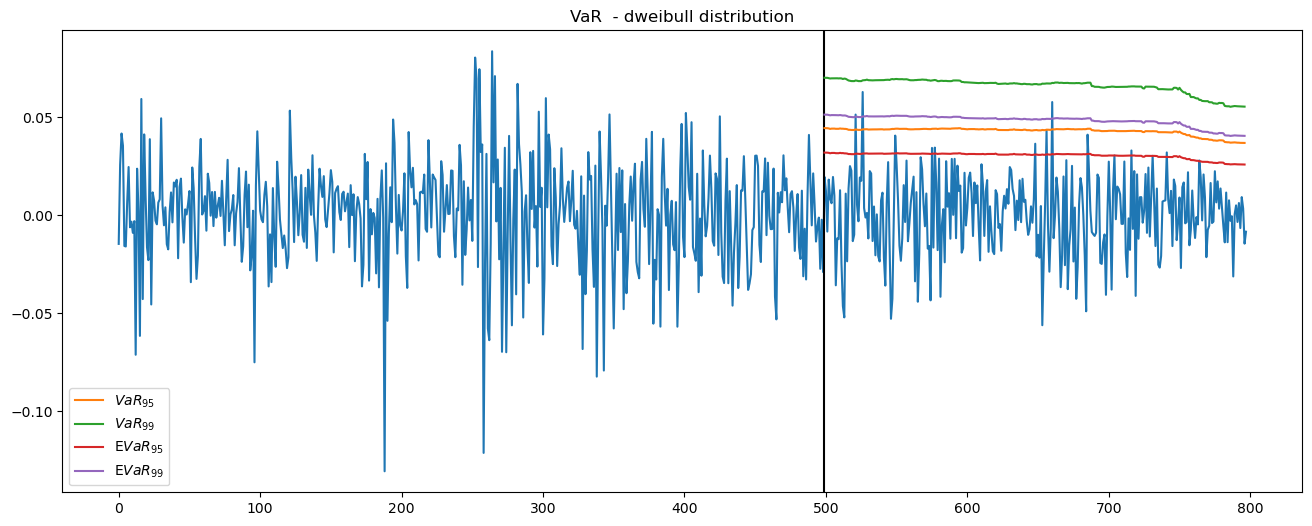

In [14]:
for dist_type in ('t' ,
'fisk' ,
'logistic' ,
'tukeylambda' ,
'powernorm',
'powerlognorm' ,
'exponweib' ,
'gengamma' ,
'loggamma' ,
'hypsecant' ,
'dweibull'):
    print(dist_type)
    filename = './data_distfit/fitted_{}.csv'.format(dist_type)
    df1 = pd.read_csv(filename, index_col=0)
    add_EVaR(df1, dist_type)
    df1.to_csv(filename)
    savename = './images/EVaR/{}.pdf'.format(dist_type)
    plot_vars(df1, dist_type, r, evar=True, save=True, name = savename)

In [24]:
for dist_type in fitted_dist['distributions'][9:20]:
    print(dist_type)
    filename = './data_distfit/fitted_{}.csv'.format(dist_type)
    df1 = pd.read_csv(filename, index_col=0)
    df1['EVaR_95'] = [eval(i)[0] for i in df1['EVaR_95']]
    df1['EVaR_99'] = [eval(i)[0] for i in df1['EVaR_99']]
    df1.to_csv(filename)

t
fisk
logistic
tukeylambda
powernorm
powerlognorm
exponweib
gengamma
loggamma
hypsecant
dweibull
